# Titanic - Machine Learning from Disaster

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Explore the dataframe

In [2]:
# Data frame.
df = pd.read_csv('train.csv', sep=',')

# Drop id, name columns.
df = df.drop(columns=["PassengerId", "Name"], axis=1)

print("Dataset shape =", df.shape)
print(df.describe())

print("\n\nFirst 10 samples in the dataset:\n\n", df.head(10))

Dataset shape = (891, 10)
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


First 10 samples in the dataset:

    Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2

## Which feature should we keep/which one should we remove?

In [3]:
print("Tot missing cabin info =", df['Cabin'].isna().sum())

# We first try to drop also  the cabin column since we have many nan values.
df = df.drop(columns=["Cabin"], axis=1)

Tot missing cabin info = 687


In [4]:
# Drop also the ticket.
df = df.drop(columns=["Ticket"], axis=1)

In [5]:
print("First 10 samples in the dataset\n\n", df.head(10))

First 10 samples in the dataset

    Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
5         0       3    male   NaN      0      0   8.4583        Q
6         0       1    male  54.0      0      0  51.8625        S
7         0       3    male   2.0      3      1  21.0750        S
8         1       3  female  27.0      0      2  11.1333        S
9         1       2  female  14.0      1      0  30.0708        C


In [6]:
print("Missing values for each column\n")
print(df.isna().sum())

Missing values for each column

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [7]:
# How can manage missing data?
# First try: use the median for the age data, fix to S for Embarked.
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df ['Embarked'].fillna('S')
print(df.isna().sum())

# Fill missing cabin data with 0.
#df["Cabin"] = df["Cabin"].fillna('0')

# Second: try to remove the age data, fix to S for Embarked
#df['Embarked'] = df ['Embarked'].fillna('S')
#df = df.dropna()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [8]:
print(df.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [9]:
# Compute X and Y sets
X = df.drop(columns=["Survived"], axis=1)
Y = df["Survived"]

print("Tot number of samples:", X.shape[0])
features_names = list(X.columns)
print("Features names:", features_names)

X = X.values
Y = Y.values

print("X shape:", X.shape)
print("Y shape:", Y.shape)

Tot number of samples: 891
Features names: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X shape: (891, 7)
Y shape: (891,)


## Encode categorical variable

In [10]:
# Print the data type of each column.
for index_col, name_col in zip(range(X.shape[1]), features_names):
    print(f"Column {name_col} (index: {index_col}) -- data type: {type(X[0, index_col])}")

Column Pclass (index: 0) -- data type: <class 'int'>
Column Sex (index: 1) -- data type: <class 'str'>
Column Age (index: 2) -- data type: <class 'float'>
Column SibSp (index: 3) -- data type: <class 'int'>
Column Parch (index: 4) -- data type: <class 'int'>
Column Fare (index: 5) -- data type: <class 'float'>
Column Embarked (index: 6) -- data type: <class 'str'>


In [11]:
# Encode the categorical variables.
from sklearn.preprocessing import OrdinalEncoder

encode_cols = [1, 6]

enc = OrdinalEncoder()
X[:, encode_cols] = enc.fit_transform(X[:, encode_cols])

In [12]:
# Print the data type of each column.
for index_col, name_col in zip(range(X.shape[1]), features_names):
    print(f"Column {name_col} (index: {index_col}) -- data type: {type(X[0, index_col])}")

Column Pclass (index: 0) -- data type: <class 'int'>
Column Sex (index: 1) -- data type: <class 'float'>
Column Age (index: 2) -- data type: <class 'float'>
Column SibSp (index: 3) -- data type: <class 'int'>
Column Parch (index: 4) -- data type: <class 'int'>
Column Fare (index: 5) -- data type: <class 'float'>
Column Embarked (index: 6) -- data type: <class 'float'>


## Split data into train/validation and test

In [13]:
# Split data into train (4/5 of samples) and test data (1/5 of samples)
m = X.shape[0]
m_train = int(4./5. * m)
m_test = m - m_train

print("Amount of data for training and deciding parameters:", m_train)
print("Amount of data for test:", m_test)

Amount of data for training and deciding parameters: 712
Amount of data for test: 179


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=m_test/m, random_state=12)

## Data Standardization

In [15]:
# -- data standardization
from sklearn.preprocessing import StandardScaler

# Continuous variables columns number.
cont_var_col = [5]

# Make copies.
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

# Scale data.
scaler = StandardScaler().fit(X_train[:, cont_var_col])
X_train_scaled[:, cont_var_col] = scaler.transform(X_train[:, cont_var_col])
X_test_scaled[:, cont_var_col] = scaler.transform(X_test[:, cont_var_col])

## Define the function that implement the k-cross fold validation

In [16]:
from sklearn.model_selection import KFold
from itertools import product

def k_fold_cross_validation(X, Y, model_func, num_folds = 5, **param_grid):

    # -- grid of hyperparams into list
    param_keys = list(param_grid.keys())
    param_values = list(param_grid.values())
    
    # Generate Cartesian product of values
    combinations = product(*param_values)
    
    # Create a list of dictionaries from combinations
    param_list = [dict(zip(param_keys, combination)) for combination in combinations]

    kf = KFold(n_splits = num_folds)
    
    err_validation_kfold = np.zeros(len(param_list),)
    err_training_kfold = np.zeros(len(param_list),)

    for i, params in enumerate(param_list):
        model = model_func(**params)

        for train_index, validation_index in kf.split(X):
            X_train_kfold, X_val_kfold = X[train_index], X[validation_index]
            Y_train_kfold, Y_val_kfold = Y[train_index], Y[validation_index]
            
            # -- data scaling: standardize features with respect to the current folds
            scaler_kfold = StandardScaler().fit(X_train_kfold)
            X_train_kfold_scaled = scaler_kfold.transform(X_train_kfold)
            X_val_kfold_scaled = scaler_kfold.transform(X_val_kfold)
        
            # -- learn the model using the training data from the k-fold
            model.fit(X_train_kfold_scaled, Y_train_kfold)
            
            # -- incremental mean
            err_training_kfold[i] += (1.0 - model.score(X_train_kfold_scaled, Y_train_kfold))
            err_validation_kfold[i] += (1.0 - model.score(X_val_kfold_scaled, Y_val_kfold))

    
    # -- compute the mean
    err_training_kfold /= num_folds
    err_validation_kfold /= num_folds
    
    # -- choose the best paramter: the one that minimizes the (the estimation of the true) loss
    best_param = param_list[np.argmin(err_validation_kfold)]

    return [best_param, err_training_kfold, err_validation_kfold]

## Decision tree model

In [17]:
# Try with default value first.
from sklearn.tree import DecisionTreeClassifier

default_model = DecisionTreeClassifier(random_state=12)
default_model.fit(X_train_scaled, Y_train)
print("Tree depth =", default_model.get_depth())
print("Train error =", 1 - default_model.score(X_train_scaled, Y_train))
print("Test error =", 1 - default_model.score(X_test_scaled, Y_test))

Tree depth = 17
Train error = 0.016853932584269704
Test error = 0.23463687150837986


In [18]:
# Let's try with k-cross validation on the max_depth parameter.
max_depth_grid = {"max_depth": [v for v in range(1, 31)], "random_state": [12]}
results = k_fold_cross_validation(X_train_scaled, Y_train, model_func=DecisionTreeClassifier, **max_depth_grid)
print("Optimal max_depth is:", results[0])
print("Min validation error (1 - R²):", np.min(results[2]))

Optimal max_depth is: {'max_depth': 3, 'random_state': 12}
Min validation error (1 - R²): 0.16993006993006993


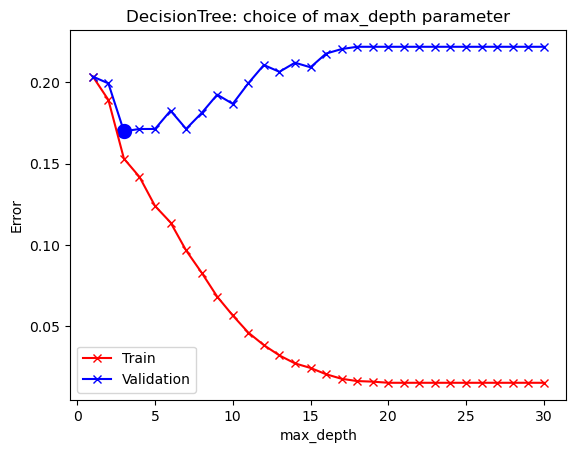

In [19]:
# -- plot the training error
plt.plot(max_depth_grid["max_depth"],
         results[1], 
         color='r', 
         marker='x')

# -- plot the validation error
plt.plot(max_depth_grid["max_depth"], 
         results[2], 
         color='b', 
         marker='x')

# -- highlight min loss
plt.scatter(results[0]["max_depth"], 
            np.min(results[2]), 
            color='b', 
            marker='o', 
            linewidths=5)

plt.legend(['Train', 'Validation'])
plt.xlabel('max_depth')
plt.ylabel('Error')
plt.title('DecisionTree: choice of max_depth parameter')
plt.savefig('train_val_loss.pdf')
plt.show()

In [20]:
# Final model for decision tree.
final_decision_tree = DecisionTreeClassifier(**results[0])
final_decision_tree.fit(X_train_scaled, Y_train)
print("1 - R² on training data:", 1 - final_decision_tree.score(X_train_scaled, Y_train))
print("1 - R² on test data:", 1 - final_decision_tree.score(X_test_scaled, Y_test))

1 - R² on training data: 0.151685393258427
1 - R² on test data: 0.22905027932960897


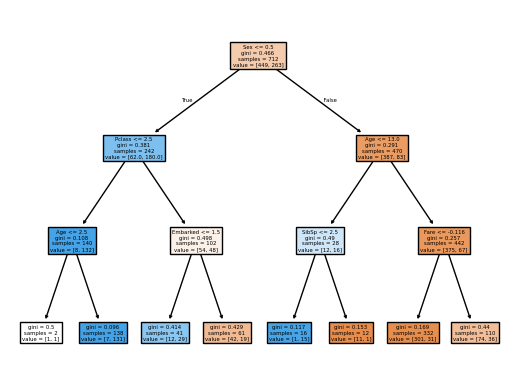

In [21]:
# Plot the tree of the final model.
from sklearn import tree

plt.figure()
tree.plot_tree(decision_tree=final_decision_tree,
               feature_names=features_names, 
               #class_names=['Survived'], 
               filled=True)
plt.savefig("tree.pdf")
plt.show()

In [22]:
# Print features importances.
print(features_names, "\n")
print(final_decision_tree.feature_importances_)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] 

[0.15864358 0.61950622 0.06074548 0.06030584 0.         0.05448752
 0.04631135]


## Some SVM model with different kernel function